In [38]:
'''Importar las librerias usadas para este algoritmo.'''
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pandas as pd

'''Importar las librerias para realizar la matriz de confusión.'''
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
'''Carga del dataset de prueba (Iris).'''
dict = datasets.load_iris()

In [3]:
'''Verificar las secciones en las que han dividido al diccionario que contiene al dataset.'''
dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
'''Verificar la forma que tendrá el dataset, cuantos datos y características.'''
print("Shape:\n", dict.data.shape)

Shape:
 (150, 4)


In [5]:
'''Leer la descripción del dataset.'''
print("Descripcion:\n", dict.DESCR)

Descripcion:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===

In [10]:
'''Ver el nombre del archivo.'''
print("Nombre del archivo:\n", dict.filename)

Nombre del archivo:
 iris.csv


In [11]:
'''Verificar los nombres de las características.'''
print("Features:\n", dict.feature_names)

Features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
'''Ver todos los datos del dataset.'''
print("Data:\n", dict.data)

Data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9

In [14]:
'''Ver los nombres del target del dataset, es decir la Y del modelo.'''
print("Labels:\n", dict.target_names)

Labels:
 ['setosa' 'versicolor' 'virginica']


In [16]:
'''Ver los datos de Y del dataset.'''
print("Labels:\n", dict.target)

Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
'''
Guardamos en una variable 'X' 
los datos de las caracteristicas del dataset, 
y en una variable 'y' los datos de salida del modelo. 
'''
X=dict.data
y=dict.target
print(X,y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
'''Verificamos cuantos datos se tienen en cada una de las variables creadas.'''
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [20]:
'''
Division de los datos usando la función 
train_test_split de sklearn. Usaremos las 
variables X,y, con un tamaño de entrenamiento 
del 30% y una selección random de posición 109'''

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=109)

In [21]:
'''Verificar la cantidad de datos que se usó para el entrenamiento.'''
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [22]:
'''creacion de la variable clf, para el algoritmo SVM con el hiperparametro Kernel Linear.'''
clf = svm.SVC(kernel='linear')

In [23]:
'''Entrenamiento del modelo usando la función fit de SVM.'''
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
'''Usando la funcion predict de la variable clf se puede predecir los valores con el modelo entrenado.'''
y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)

[2 1 2 0 2 1 0 2 1 2 2 0 1 0 0 0 1 2 0 1 1 0 2 0 0 1 2 1 1 2 1 2 1 2 2 1 0
 2 2 1 1 1 1 2 0]
[2 1 2 0 2 1 0 2 1 2 2 0 1 0 0 0 1 2 0 1 2 0 2 0 0 2 2 1 1 2 1 2 1 2 2 1 0
 2 2 1 1 1 1 2 0]


In [32]:
'''
Para obtener el Accuracy del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo '''

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [29]:
'''
Para obtener la precision y recall del modelo, 
usaremos la libreria Metrics de sklearn 
con los datos de prueba y los que predijo 
el modelo, Pues al ser datos multiclase, 
debemos usar la funcion classification report '''

print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     0.882     0.938        17
           2      0.889     1.000     0.941        16

    accuracy                          0.956        45
   macro avg      0.963     0.961     0.960        45
weighted avg      0.960     0.956     0.955        45



In [34]:
'''
Unimos los datos obtenidos, 
es decir la prediccion del modelo 
y los datos testeado para tenerlos 
dentro un mismo array con labels.'''

data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }
print(data)

{'y_Actual': array([2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0,
       2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2,
       0]), 'y_Predicted': array([2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0,
       2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2,
       0])}


In [35]:
'''Crear el dataframe con los datos unidos en el array creado.'''
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

In [36]:
'''
Crear la matriz de confusión 
con los datos obtenidos en el 
proceso de entrenamiento de 
los datos.'''
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

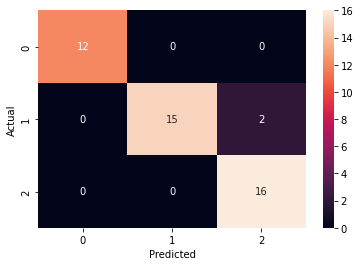

In [39]:
'''Crear un mapa heatmap, con la matriz de confusión.'''
sn.heatmap(confusion_matrix, annot=True)

In [41]:
'''Mostrar la matriz...'''
plt.show()